In [1]:
from body_matrix import load, infer, process, draw

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Raw_Vids/VID_20230109_154951~2.mp4", 
    -90, 
    40
)

selected_box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
    sample_frame, "cpu", selected_box, 
    0.99, segment_model, segment_transform
)

Found  9  person in the frame
Distances:  [22.62548828125, 162.87408447265625, 509.7685966491699, 21.328018188476562, 277.08660888671875, 251.41407775878906, 150.89122009277344, 47.89398193359375, 157.73812866210938]
Areas:  [85893.29776924103, 53805.958535805345, 11687.49616825534, 4007.4995117206126, 2025.9671002328396, 1678.8271613456309, 2405.1815660856664, 2410.0547087341547, 495.1052218005061]
FOCUSES:  [3796.306921712792, 330.3530988985448, 22.92706189647622, 187.89835400111613, 7.311674527949184, 6.677538411179688, 15.939837749385768, 50.320616733763295, 3.1387796089623348]
Select keypoint index 0
Found  6  person in the frame
[0.8962397575378418, 808.0972290039062, 65.64437103271484, 976.2938842773438]
[483.73626708984375, 763.2023315429688, 649.5147094726562, 1281.3233642578125]
[486.70794677734375, 763.4951782226562, 655.180419921875, 1283.17626953125]
[483.73626708984375, 763.2023315429688, 649.5147094726562, 1281.3233642578125]
[641.110107421875, 784.1318969726562, 771.313

In [2]:
from body_matrix import process

outside_segmentation_positions = process.outside_segmentation_area(
    sample_image=sample_frame, 
    bool_mask=bool_mask
)

## Alter pixel value

In [3]:
outside_segmentation_positions[0]

[0, 0]

In [4]:
import numpy as np
sample_array = np.array(sample_frame)

In [6]:
sample_array[outside_segmentation_positions] = sample_array[outside_segmentation_positions] * 2 + 3

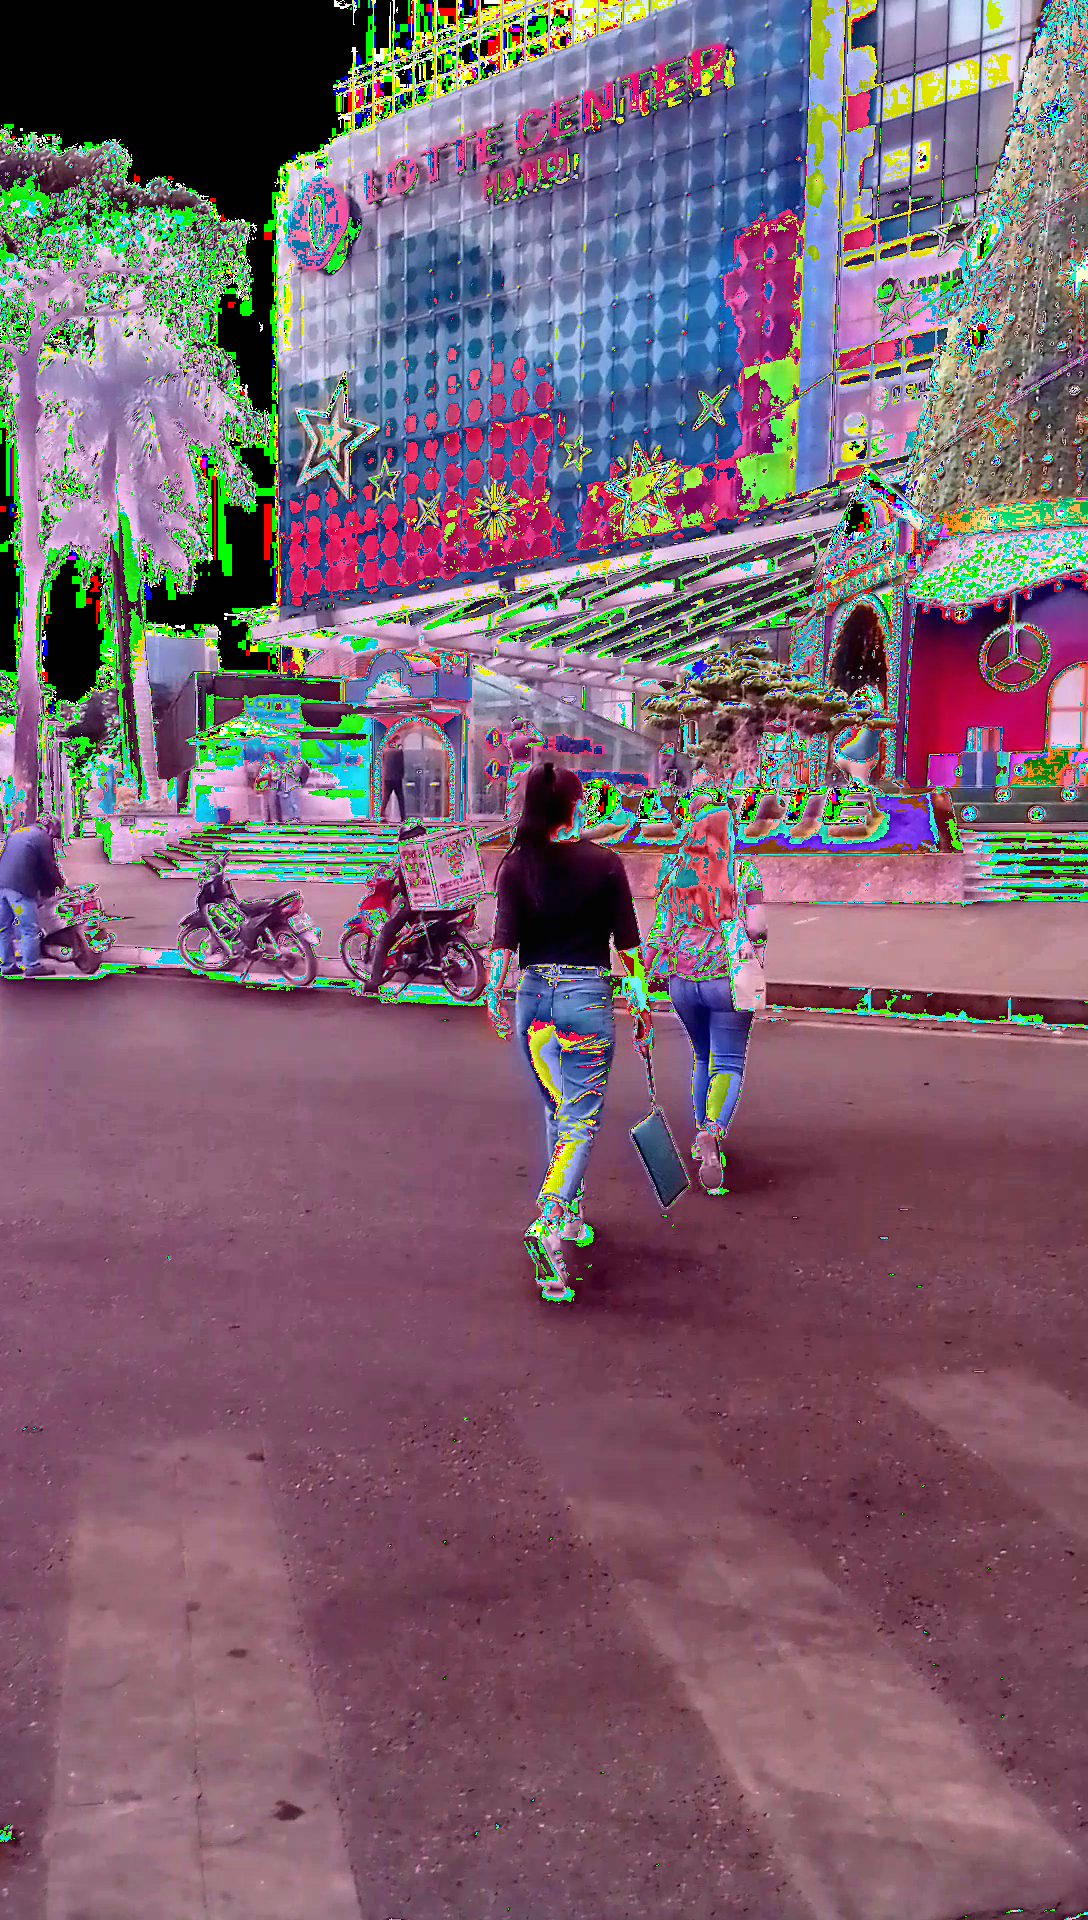

In [7]:
from PIL import Image

new_image = Image.fromarray(sample_array)
new_image